# Objective

Visualize the network with different libraries.

# Instructions

- Import the Matplotlib and NetworkX class from the pyvis library.
- Create a new directed graph object, including only the first 100 rows of our initial user ratings dataset.
- Visualize the new graph using the draw function of NetworkX.
- Add color to the edges of the NetworkX draw based on the user ratings.
- Create another visualization, but this time, use the NetworkX object of the pyvis library.

# Load libraries & data

In [1]:
import pandas as pd
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
from pyvis.network import Network

In [2]:
df = (
    pd.read_csv('soc-sign-bitcoinotc.csv', nrows=100, names=['source', 'target', 'rating', 'time'])
    .assign(time=lambda df: df.time.apply(datetime.fromtimestamp))
)

In [3]:
df.head()

,source,target,rating,time
0,6,2,4,2010-11-08 19:45:11.728360
1,6,5,2,2010-11-08 19:45:41.533780
2,1,15,1,2010-11-08 20:05:40.390490
3,4,3,7,2010-11-08 20:41:17.369750
4,13,16,8,2010-11-08 23:10:54.447460


In [4]:
df.shape

(100, 4)

# Create NetworkX graph

In [5]:
g = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr='rating', create_using=nx.DiGraph)

# Visualize graph with native function

## Basic visualization from NetworkX

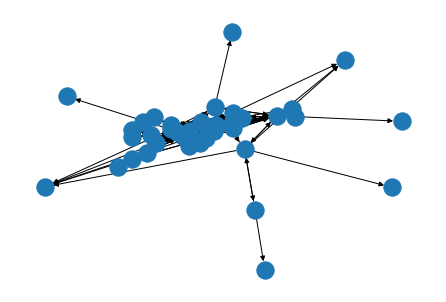

In [6]:
nx.draw(g)

## Color the edges according to the edge values (and other shenanigans)

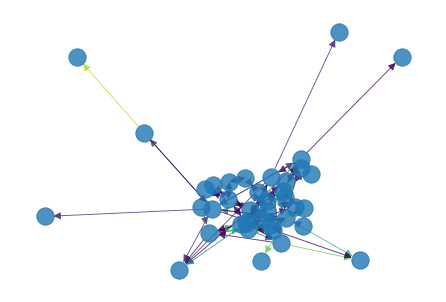

In [7]:
nx.draw(g, edge_color=df.rating, alpha=0.8, arrowsize=15, width=.9)

# Draw the graph using `pyvis`

In [8]:
nt = Network('500px', '500px', notebook=True)
nt.from_nx(g)

In [9]:
nt.show('nx.html')